<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/Visualizing_Clusters_with_Python%E2%80%99s_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('Pokemon.csv')
# prepare data
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns = drop_cols)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


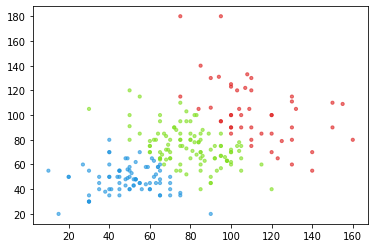

In [4]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
import matplotlib.pyplot as plt
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)

# Multiple Dimensions

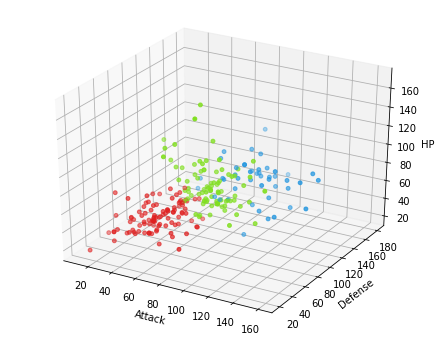

In [6]:
from mpl_toolkits.mplot3d import Axes3D
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

In [7]:
# Visualize our data
import plotly.express as px
colors = px.colors.sequential.Plasma
colors[0] , colors[1],colors[2] = ['red','green','blue']
fig = px.scatter_3d(df,x='Attack',y='Defense',z='HP',
                    color=df['c'].astype(str),
                    color_discrete_sequence=colors,height=500,width=1000
                    )
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

# Annotation
If data visualization is storytelling, annotations are the equivalent of a narrator in our story. They should help the viewer understand and focus on what’s important while not taking too much space on the plot.



Text(0, 0.5, 'Defense')

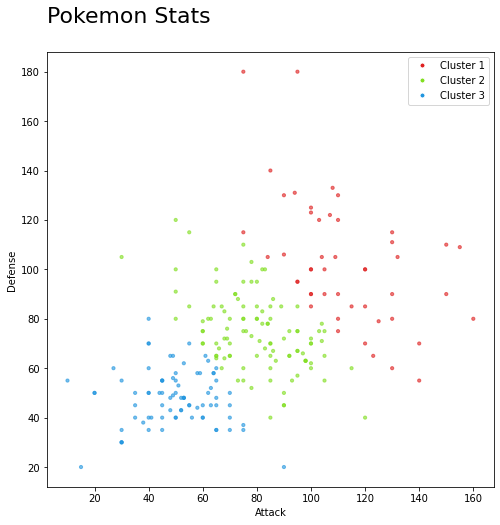

In [63]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

We can also give the viewer some reference points. Displaying the centroids and drawing reference lines to averages or a percentile can help explain our cluster.



In [42]:
[df.Defense.mean()] * 2

[71.15384615384616, 71.15384615384616]

Text(0, 0.5, 'Defense')

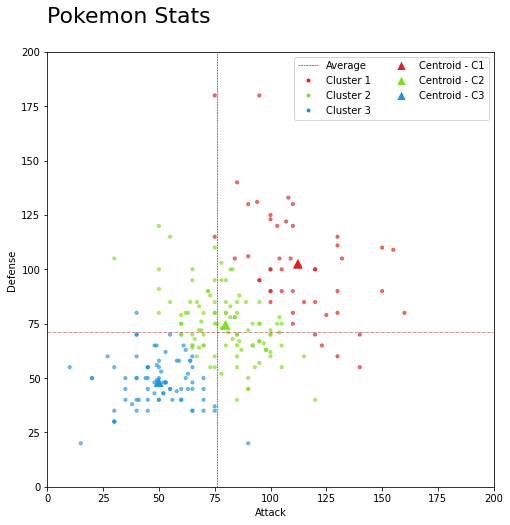

In [64]:
fig , ax = plt.subplots(1,figsize=(8,8))

#plot data
plt.scatter(df.Attack , df.Defense , c=df.c , alpha=0.6,s=10)
# plot centroids
plt.scatter(cen_x , cen_y , marker='^' , c=colors , s=70)

# plot Attack mean
plt.plot([df.Attack.mean()]*2 , [0,200] , color='black' , lw=0.5 , linestyle='--')
plt.xlim(0,200)

# plot Defense mean
plt.plot([0,200],[df.Defense.mean()]*2  , color='Brown' , lw=0.5 , linestyle='-.')
plt.ylim(0,200)

# create a list of legend elements
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids

cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

The red cluster groups the highest attack and defence values, while the blue has the lowest, and the green group is generally closer to the average.



# Lines
Illustrating how our cluster work can be as important as its results. In k-means, since we’re working with distances, connecting the points to their respective centroids can help us visualize what the algorithm is actually doing

In [54]:
df.head(
    
)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cen_x,cen_y,c
0,Bulbasaur,318,45,49,49,65,65,45,2,49.875000,48.075000,#2095DF
1,Ivysaur,405,60,62,63,80,80,60,2,49.875000,48.075000,#2095DF
2,Venusaur,525,80,82,83,100,100,80,1,79.801887,74.386792,#81DF20
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,0,79.801887,102.479167,#DF2020
4,Charmander,309,39,52,43,60,50,65,2,49.875000,48.075000,#2095DF


Text(0, 0.5, 'Defense')

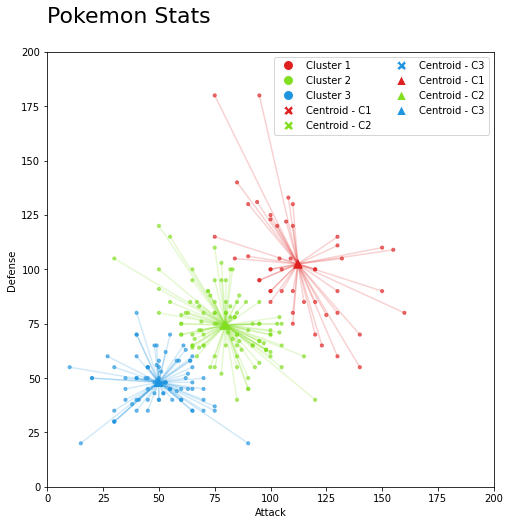

In [65]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='X', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

now the relationship between the clusters and the centroids is totallt explicit , and it's easier to explain how the algorithm works,

we can also see how spread out the values in eache cluster are.

for example , the red values appear to be farther their centroid than the blue values. if the groups' variance is something important to our anaylsis , a chart like this could be effective .
we should also note that the seperation between green and blue wasn't so evident in the previous visualizations

# Convex Hull
Another option to help us visualize our clusters’ size or spread is to draw a shape around it or a shadow. Doing so manually would take forever and for sure wouldn’t be worth the effort.

Luckily, there are ways to automate that.

The convex hull is the smallest set of connections between our data points to form a polygon that encloses all the points, and there are ways to find the convex hull systematically — That is to say, we can use Sklearn to get the contour of our dataset.

In [70]:
df[df.cluster == 1][['Attack' , 'Defense'] ]

,Attack,Defense
2,82,83
6,84,78
8,104,78
10,63,80
11,83,100
...,...,...
730,73,55
731,81,71
736,68,72
741,100,62


(0.0, 200.0)

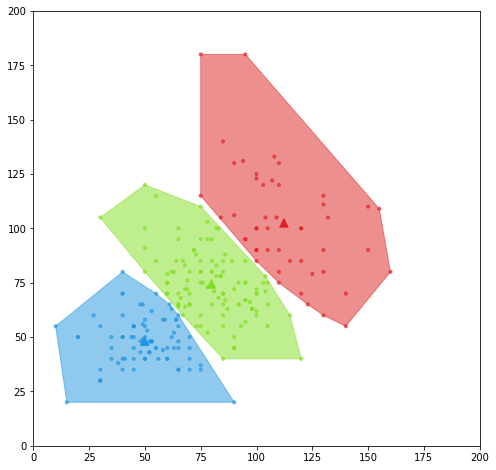

In [73]:
from scipy.spatial import ConvexHull
import numpy as np
fig ,ax = plt.subplots(1,figsize=(8,8))
# plot data
plt.scatter(df.Attack , df.Defense , c = df.c , alpha=0.6 , s=10)
#plot centers
plt.scatter(cen_x , cen_y ,marker='^' , c = colors,s=70)

# draw enclosure
for i in df.cluster.unique():
  points = df[df.cluster == i][['Attack' , 'Defense'] ].values
  # get convex hull
  hull = ConvexHull(points)
  # get x and y coordinates
  #repeat last point to close the polgon
  x_hull = np.append(points[hull.vertices,0],points[hull.vertices,0][0])
  y_hull = np.append(points[hull.vertices,1],points[hull.vertices,1][0])
  # plot shape
  plt.fill(x_hull ,y_hull , alpha=0.5 , c=colors[i])

plt.xlim(0,200)
plt.ylim(0,200)

(0.0, 200.0)

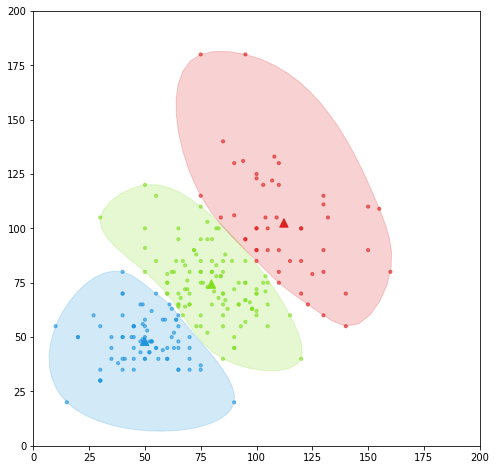

In [74]:
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(0,200)
plt.ylim(0,200)